In [ ]:
%matplotlib inline


# Sign test
In this tutorial we demonstrate how to check equal size of two samples using the sign test. To do so, we provide an example
in which we check if Heung-Min Son shoots with both feet the same number of times. 

## Null and alternative hypothesis
H0 = "Heung-Min Son shoots with both feet the same number of times"

H1 = "Heung-Min Son does not shoot with both feet the same number of times"


The sign test is a non-parametric statistical test used to determine if there is a significant difference between two paired samples. It is particularly useful when the data is not normally distributed or when the sample size is small.

The sign test works by comparing the signs of the differences between paired observations. Instead of comparing the actual values, it focuses on the direction of the differences. The steps involved in conducting a sign test are as follows:

1. Hypothesis formulation: Define the null hypothesis (H0) and the alternative hypothesis (H1). In this case, the null hypothesis would be that Heung-Min Son shoots with both feet an equal number of times.

2. Data collection: Collect paired observations of the variable of interest. For example, record the number of times Heung-Min Son shoots with his left foot and the number of times he shoots with his right foot.

3. Calculate the differences: Calculate the differences between the paired observations.

4. Assign signs: Assign a "+" sign if the difference is positive (right foot > left foot) and a "-" sign if the difference is negative (left foot > right foot). If there is no difference, you can omit it from the analysis.

5. Count the number of "+" and "-" signs: Count the number of observations with each sign.

6. Calculate the test statistic: The test statistic for the sign test is the smaller of the two counts (either "+" or "-").

7. Determine the critical value: Based on the significance level and the sample size, determine the critical value from the sign test table or using a statistical software.

8. Compare the test statistic to the critical value: If the test statistic is less than or equal to the critical value, reject the null hypothesis. Otherwise, fail to reject the null hypothesis.

9. Draw conclusions: Based on the comparison in the previous step, draw conclusions about whether there is a significant difference between the two samples.

In the example you mentioned, the sign test would involve collecting data on the number of times Heung-Min Son shoots with his left foot and his right foot. The sign test would then be applied to determine if there is a significant difference in the number of shots taken with each foot.

In [1]:
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
#opening data
import os
import pathlib
import warnings

pd.options.mode.chained_assignment = None # that is for avoiding some warnings
warnings.filterwarnings('ignore')

## Opening the dataset

First we open the data. For this example we will use WyScout data from 2017/18 Premier League season.  To meet file size requirements of Github, we have to open it from different files,
but you can open the file locally from the directory you saved it in. Also, we open the file containing all players in WyScout database.



NOTE: The method used by the tutorial to open simple files is unnecessarily confusing. It is better to use the pandas library to open the files. Also, "train" is not a good name for the variable that contains the data. It is better to use a name that describes the data such as "events_england". "train" is often used in machine learning to refer to the data used to train a model.

In [3]:
# Open event data

# information about all events that occured in all the games during 2017/18 Premier League
path = '../wyscout-data/events/events_England.json'
events_england = pd.read_json(path)

# Open dataset with players
path = '../wyscout-data/players.json'
player_df = pd.read_json(path)

## Preparing the dataset

First, we filter the events to only keep shots. Then, we check for Son's id in the player database. As the next step,
we keep shots made by him. Then, we look for the shots made with his left (ones with *id* = 401) and right (ones with *id* = 401) foot.
In the end, we create a list with ones for shots with his left foot and -1 for shots with his right foot.

NOTE: So basically what we need to do is just count the number of times he shoots with each foot. We don't need to create a list with ones and -1s. We can just count the number of times he shoots with each foot and then use the sign test to determine if there is a significant difference between the two counts lmao.

### Useful link

[Here](https://support.wyscout.com/matches-wyid-events#9-available-event-and-sub-event-ids-combinations) is the avaliable documentation on WyScout event and stuff. We found that subevent id 401 is a shot with the left foot and 402 is a shot with the right foot.



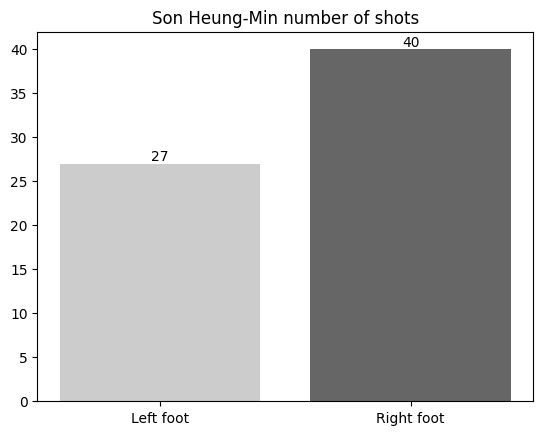

In [13]:
# My method

# Take shots only using pd
shots = events_england[events_england['subEventName']=='Shot']

# Take son's id
son_id = player_df[player_df['shortName']=='Son Heung-Min'].wyId.values[0]

son_shots = shots[shots['playerId']==son_id]

# Count left foot shots subevent id = 401 (tags)
left_shots = son_shots[son_shots['tags'].apply(lambda x: {'id': 401} in x)]
cnt_left_shots = len(left_shots)

# Count right foot shots subevent id = 402 (tags)
right_shots = son_shots[son_shots['tags'].apply(lambda x: {'id': 402} in x)]
cnt_right_shots = len(right_shots)

# Plot two bars, left light gray, right dark gray
plt.bar(['Left foot', 'Right foot'], [cnt_left_shots, cnt_right_shots], color=['0.8', '0.4'])
plt.title('Son Heung-Min number of shots')

# Add value on top of each bar
plt.text(0, cnt_left_shots, cnt_left_shots, ha='center', va='bottom')
plt.text(1, cnt_right_shots, cnt_right_shots, ha='center', va='bottom')

plt.show()


After seeing this result, we don't need a statistical test to conclude that Son shoots more with his right foot than with his left foot. In simple cases it's important to check the data before applying a statistical test.

In [6]:
# Tutorial method

#take shots only
shots = events_england.loc[events_england['subEventName'] == 'Shot'] 
#look for son's id
son_id = player_df.loc[player_df["shortName"] == "Son Heung-Min"]["wyId"].iloc[0]
#get son's shot
son_shots = shots.loc[shots["playerId"] == son_id]

#left leg shots
lefty_shots = son_shots.loc[son_shots.apply (lambda x:{'id':401} in x.tags, axis = 1)]
#right leg shots
righty_shots = son_shots.loc[son_shots.apply (lambda x:{'id':402} in x.tags, axis = 1)]

#create list with ones for left foot shots and -1 for right foot shots   
l = [1] * len(lefty_shots) 
l.extend([-1] * len(righty_shots))

## Testing the hypothesis

Now we can test the hypothesis that Heung-Min Son is indeed ambidextrous. To do so, a [sign test](https://en.wikipedia.org/wiki/Sign_test) is used.
We set the significance level at 0.05. After conducting the hypothesis, there's no reason to reject the null hypothesis. Therefore, we claim that
Son shoots with his right and left foot the same number of times.



In [8]:
%pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 28.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 22.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
from statsmodels.stats.descriptivestats import sign_test
test = sign_test(l, mu0 = 0)
pvalue = test[1]

if pvalue < 0.05:
    print("P-value amounts to", str(pvalue)[:5], "- We reject null hypothesis - Heung-Min Son is not ambidextrous")
else:
    print("P-value amounts to", str(pvalue)[:5], " - We do not reject null hypothesis - Heung-Min Son is ambidextrous")

P-value amounts to 0.142  - We do not reject null hypothesis - Heung-Min Son is ambidextrous
